<a href="https://colab.research.google.com/github/Cstnly/LeNet-5-DCNN-Cifar10/blob/main/Tugas2DeepLearningDCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, AveragePooling2D, BatchNormalization
from keras.optimizers import SGD

In [ ]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


Dataset Cifar10: 60,000 32×32 pixel

In [ ]:
trainX

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

Normalisasi menjadi range antara 0-1

In [ ]:
trainX.astype('float32')
testX.astype('float32')
trainX, testX = trainX / 255.0, testX / 255.0

In [ ]:
trainX

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

mengubah menjadi categorical 0/1

In [ ]:
trainY

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
num_classes = 10
trainY = to_categorical(trainY, num_classes=num_classes)
testY = to_categorical(testY, num_classes=num_classes)

In [ ]:
trainY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# LeNet-5 Architecture
model = Sequential()
# C1 Convolution Layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 3)))
# S2 SubSampling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
# C3 Convolution Layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
# S4 SubSampling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
# C5 Fully Connected Layer
model.add(Dense(units=120, activation='tanh'))
# Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
model.add(Flatten())
# FC6 Fully Connected Layers
model.add(Dense(units=84, activation='tanh'))
# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model with an optimizer, loss function, and metrics
# optimizer = SGD(lr=0.001, momentum=0.9)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1, momentum=0.0), metrics=['accuracy'])

# Print a summary of the LeNet-5's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 5, 5, 120)         2040      
                                                                 
 flatten (Flatten)           (None, 3000)              0

Train Model

In [ ]:
history = model.fit(trainX, trainY, batch_size=64, epochs=25, validation_data=(testX, testY), shuffle=True)

Epoch 1/25
782/782 [==============================] - 16s 7ms/step - loss: 2.0713 - accuracy: 0.2583 - val_loss: 1.9376 - val_accuracy: 0.3124
Epoch 2/25
782/782 [==============================] - 5s 7ms/step - loss: 1.8514 - accuracy: 0.3470 - val_loss: 1.8128 - val_accuracy: 0.3581
Epoch 3/25
782/782 [==============================] - 5s 6ms/step - loss: 1.7638 - accuracy: 0.3785 - val_loss: 1.7979 - val_accuracy: 0.3692
Epoch 4/25
782/782 [==============================] - 5s 6ms/step - loss: 1.7022 - accuracy: 0.4015 - val_loss: 1.6864 - val_accuracy: 0.3988
Epoch 5/25
782/782 [==============================] - 5s 7ms/step - loss: 1.6441 - accuracy: 0.4219 - val_loss: 1.6193 - val_accuracy: 0.4263
Epoch 6/25
782/782 [==============================] - 5s 6ms/step - loss: 1.5922 - accuracy: 0.4381 - val_loss: 1.6076 - val_accuracy: 0.4292
Epoch 7/25
782/782 [==============================] - 5s 7ms/step - loss: 1.5478 - accuracy: 0.4518 - val_loss: 1.7626 - val_accuracy: 0.3819
Epoch

Evaluate Model

Test Loss: 1.3245, Test Accuracy: 53.29%


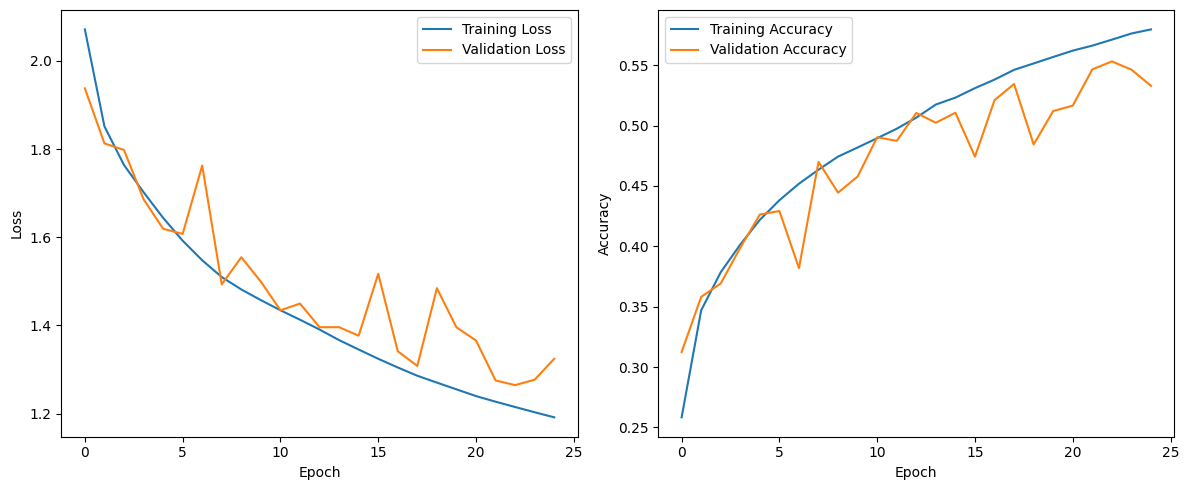

In [ ]:
test_loss, test_accuracy = model.evaluate(testX, testY, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history (loss and accuracy over epochs)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan hasil grafik loss diatas, dapat  dikatakan tidak ada tanda-tanda overfit pada model. model LeNet-5 terlalu sederhana sehingga belum dapat mengekstraksi fitur yang relevan dari data. Maka kita harus mengganti model yang lebih kompleks. Selain itu juga perlu adanya penyetelan hyperparameter dan regularization untuk meningkatkan performa model

Epoch 1/25
391/391 [==============================] - 13s 24ms/step - loss: 1.6914 - accuracy: 0.3999 - val_loss: 1.3578 - val_accuracy: 0.5098
Epoch 2/25
391/391 [==============================] - 8s 22ms/step - loss: 1.2481 - accuracy: 0.5463 - val_loss: 1.1857 - val_accuracy: 0.5835
Epoch 3/25
391/391 [==============================] - 8s 22ms/step - loss: 1.0920 - accuracy: 0.6072 - val_loss: 1.0604 - val_accuracy: 0.6134
Epoch 4/25
391/391 [==============================] - 8s 21ms/step - loss: 0.9872 - accuracy: 0.6485 - val_loss: 0.9963 - val_accuracy: 0.6532
Epoch 5/25
391/391 [==============================] - 8s 22ms/step - loss: 0.9060 - accuracy: 0.6796 - val_loss: 0.8733 - val_accuracy: 0.6911
Epoch 6/25
391/391 [==============================] - 9s 22ms/step - loss: 0.8470 - accuracy: 0.7004 - val_loss: 0.9182 - val_accuracy: 0.6754
Epoch 7/25
391/391 [==============================] - 8s 21ms/step - loss: 0.8027 - accuracy: 0.7201 - val_loss: 0.7661 - val_accuracy: 0.727

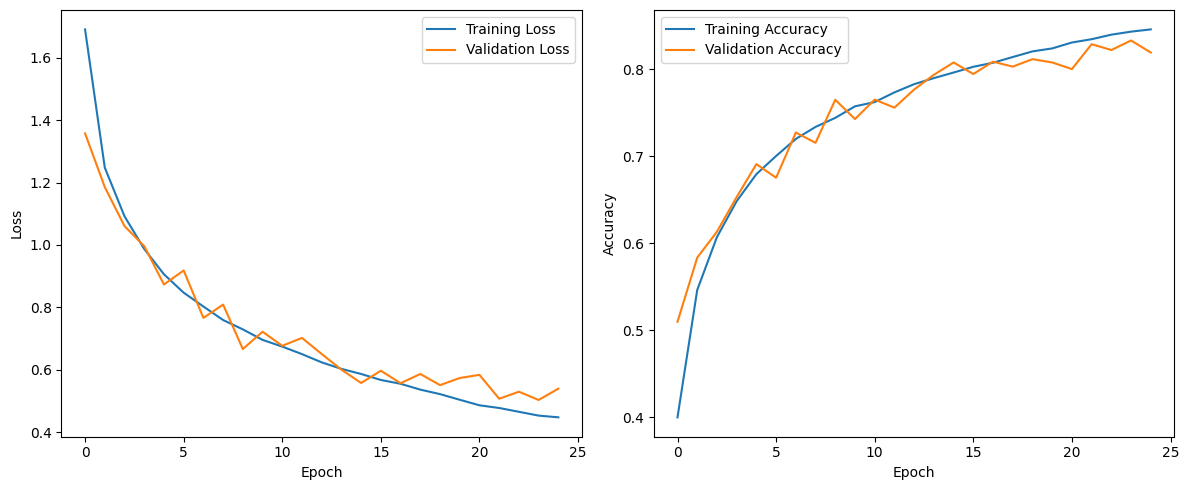

In [ ]:
# New Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=00.1, momentum=0.9), metrics=['accuracy'])

# Fit model
history = model.fit(trainX, trainY, batch_size=128, epochs=25, validation_data=(testX, testY), shuffle=True)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(testX, testY)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history (loss and accuracy over epochs)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan hasil diatas, dapat dilihat bahwa menggunakan model yang lebih kompleks, hyperparameter tuning(lr), serta menggunakan dropout, maxpooling, dan batchnormalization berhasil dalam mengatasi masalah klasifikasi gambar pada dataset CIFAR-10.